In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm
import numpy as np
import json
import datetime

import matplotlib.pyplot as plt


Dataset generated in notebook 01

In [2]:
songs_clean_ts= pd.read_csv(os.path.join('data', 'songs_timeseries_2017_2022.csv'), index_col=0)
songs_clean_ts.head()

/home/fterroso/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,song_id,num_day,total_countries,current_countries,inc,dec
0,6m2LNopVJKsvBB9l7Z1rwn,1,1,1,1,0
1,6m2LNopVJKsvBB9l7Z1rwn,2,1,1,0,0
2,6m2LNopVJKsvBB9l7Z1rwn,3,1,1,0,0
3,6m2LNopVJKsvBB9l7Z1rwn,4,1,1,0,0
4,6m2LNopVJKsvBB9l7Z1rwn,5,1,1,0,0


In [3]:
songs_to_keep = songs_clean_ts['song_id'].unique().tolist()

print(f'Number of songs under consideration: {len(songs_to_keep)}')

Number of songs under consideration: 8467


Dataset generated in notebook 01

In [4]:
ranking_df= pd.read_csv(os.path.join('data', 'clean_ranking_2017_2022.csv'), index_col=0, parse_dates=['Date', 'release_date'])
clean_ranking_df= ranking_df[ranking_df['song_id'].isin(songs_to_keep)]
clean_ranking_df.head()

/home/fterroso/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Position,Track Name,Artist,Streams,Date,Region,song_id,release_date
16,17,Olha a Explosão,MC Kevinho,12388,2018-01-01,Ecuador,6m2LNopVJKsvBB9l7Z1rwn,2017-01-01
19,20,Besame,"Valentino, Manuel Turizo",11127,2018-01-01,Ecuador,7Ckhk1XW5NV2k4jpqtQNlz,2017-06-03
22,23,Una Lady Como Tú,Manuel Turizo,10766,2018-01-01,Ecuador,7MHN1aCFtLXjownGhvEQlF,2017-04-12
25,26,Scooby Doo Pa Pa,Dj Kass,9879,2018-01-01,Ecuador,1xndOD8CreR5ctkOv5G1LN,2017-12-08
28,29,Déjate Llevar,"Juan Magán, Belinda, Manuel Turizo, Snova, B-Case",8995,2018-01-01,Ecuador,3xWEI23MLJrD0dpDcDUTW6,2017-11-28


In [5]:
clean_ranking_df = clean_ranking_df[clean_ranking_df['Region']!='World']

In [6]:
clean_ranking_df['Region'].unique()

array(['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
       'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
       'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
       'CostaRica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
       'Lithuania', 'Philippines', 'Taiwan', 'NewZealand', 'Turkey',
       'USA', 'ElSalvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
       'Switzerland', 'Denmark', 'Bolivia', 'Poland', 'Austria', 'Sweden',
       'CzechRepublic', 'Netherlands', 'Columbia', 'Singapore',
       'DominicanRepublic', 'Luxemborg', 'UnitedKingdom', 'Paraguay',
       'Australia', 'Latvia', 'Greece', 'HongKong', 'Russia',
       'UnitedArabEmirates', 'Belarus', 'India', 'SouthAfrica', 'Romania',
       'Ukraine', 'Egypt', 'Nigeria', 'Korea', 'Kazakhstan',
       'SaudiArabia', 'Nicaragua', 'Marocco', 'Israel', 'Bulgaria',
       'Vietnam'], dtype=object)

In [7]:
clean_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749683 entries, 16 to 22869852
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   Date          datetime64[ns]
 5   Region        object        
 6   song_id       object        
 7   release_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 188.8+ MB


In [8]:
initial_date= datetime.datetime(2017, 1, 1)
def get_day_of_study_fn(d):
    return (d-initial_date).days 

In [9]:
clean_ranking_df['day_of_study'] = clean_ranking_df['Date'].apply(get_day_of_study_fn)
clean_ranking_df['release_month'] = clean_ranking_df['release_date'].dt.month

In [10]:
clean_ranking_df.head()

,Position,Track Name,Artist,Streams,Date,Region,song_id,release_date,day_of_study,release_month
16,17,Olha a Explosão,MC Kevinho,12388,2018-01-01,Ecuador,6m2LNopVJKsvBB9l7Z1rwn,2017-01-01,365,1
19,20,Besame,"Valentino, Manuel Turizo",11127,2018-01-01,Ecuador,7Ckhk1XW5NV2k4jpqtQNlz,2017-06-03,365,6
22,23,Una Lady Como Tú,Manuel Turizo,10766,2018-01-01,Ecuador,7MHN1aCFtLXjownGhvEQlF,2017-04-12,365,4
25,26,Scooby Doo Pa Pa,Dj Kass,9879,2018-01-01,Ecuador,1xndOD8CreR5ctkOv5G1LN,2017-12-08,365,12
28,29,Déjate Llevar,"Juan Magán, Belinda, Manuel Turizo, Snova, B-Case",8995,2018-01-01,Ecuador,3xWEI23MLJrD0dpDcDUTW6,2017-11-28,365,11


In [11]:
clean_ranking_df.to_csv(os.path.join('data','clean_ranking_2017_2022_v2.csv'))

In [12]:
clean_ranking_df.groupby(['song_id','Region'])['Date'].max()

song_id                 Region       
007d7JT41sSc1HqWTs4uw7  Australia       2017-03-08
                        Ireland         2017-04-19
                        Malaysia        2017-03-08
                        Philippines     2017-02-14
                        Singapore       2017-03-08
                                           ...    
7zxd3J5hMPeLN71VS8vnE4  Latvia          2017-12-24
                        NewZealand      2017-12-24
                        Poland          2017-12-24
                        Taiwan          2017-12-25
                        UnitedKingdom   2017-12-25
Name: Date, Length: 38649, dtype: datetime64[ns]

In [13]:
song_max_dates_df =clean_ranking_df.groupby(['song_id','Region'])['Date'].max().to_frame()
song_max_dates_df.columns = ['max_date']
song_max_dates_df.head()

max_date
song_id                Region                
007d7JT41sSc1HqWTs4uw7 Australia   2017-03-08
                       Ireland     2017-04-19
                       Malaysia    2017-03-08
                       Philippines 2017-02-14
                       Singapore   2017-03-08

In [14]:
song_dates_df =clean_ranking_df.groupby(['song_id','Region'])['Date'].min().to_frame()
song_dates_df.columns = ['min_date']
song_dates_df['max_date'] = song_max_dates_df['max_date']
song_dates_df['num_days_in_list'] = (song_dates_df['max_date']-song_dates_df['min_date']).dt.days

song_dates_df.head()

min_date   max_date  num_days_in_list
song_id                Region                                             
007d7JT41sSc1HqWTs4uw7 Australia   2017-03-08 2017-03-08                 0
                       Ireland     2017-02-07 2017-04-19                71
                       Malaysia    2017-03-08 2017-03-08                 0
                       Philippines 2017-02-14 2017-02-14                 0
                       Singapore   2017-03-08 2017-03-08                 0

In [15]:
song_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 38649 entries, ('007d7JT41sSc1HqWTs4uw7', 'Australia') to ('7zxd3J5hMPeLN71VS8vnE4', 'UnitedKingdom')
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   min_date          38649 non-null  datetime64[ns]
 1   max_date          38649 non-null  datetime64[ns]
 2   num_days_in_list  38649 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.1+ MB


In [16]:
song_dates_df['num_days_in_list'].describe()

count    38649.000000
mean       203.796761
std        381.052382
min          0.000000
25%          4.000000
50%         40.000000
75%        199.000000
max       1982.000000
Name: num_days_in_list, dtype: float64

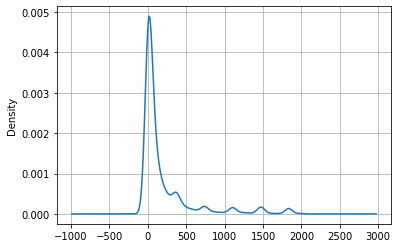

In [17]:
song_dates_df['num_days_in_list'].plot.kde(grid=True);

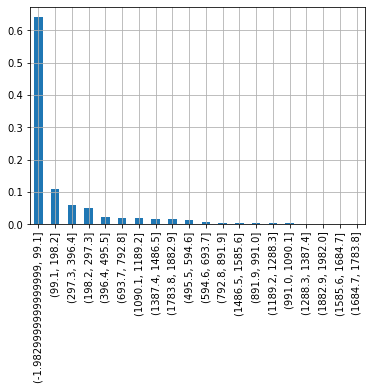

In [18]:
song_dates_df['num_days_in_list'].value_counts(bins=20, normalize=True).plot(kind='bar', grid=True);

In [19]:
song_dates_df.to_csv(os.path.join('data', 'songs_dates_2017_2022.csv'))

In [20]:
song_dates_df['num_weeks_in_list'] = song_dates_df['num_days_in_list']/7


In [22]:
song_dates_df.describe()

,num_days_in_list,num_weeks_in_list
count,38649.000000,38649.000000
mean,203.796761,29.113823
std,381.052382,54.436055
min,0.000000,0.000000
25%,4.000000,0.571429
50%,40.000000,5.714286
75%,199.000000,28.428571
max,1982.000000,283.142857


In [23]:
song_dates_df.median()

/tmp/ipykernel_3300353/1133952881.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  song_dates_df.median()


num_days_in_list     40.000000
num_weeks_in_list     5.714286
dtype: float64